In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
sns.set()

In [2]:
# function to read and normalize data
def get_data():
  (X_train, y_train), (X_test, y_test) = cifar10.load_data()
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  X_train = X_train/255.0
  X_test = X_test/255.0
  return X_train, y_train, X_test, y_test

In [3]:
# function to build the model,  VGG stype
def get_model():
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(32,32,3)))
  model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(.2))
  model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
  model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(.2))
  model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
  model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(.2))
  model.add(Flatten())
  model.add(Dense(units=128, activation='relu'))
  model.add(Dropout(.2))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  model.summary()
  return model

In [4]:
X_train, y_train, X_test, y_test = get_data()

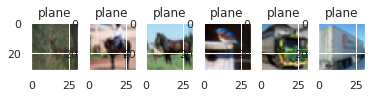

In [5]:
# labels of the 10 image classes
cifar10_names = {
    0: 'plane',
    1: 'car',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'boat',
    9: 'truck'
}

# show a few images and their labels
# plot 1st few images
start = 10
end = 16
fig, ax = plt.subplots(1, end-start)
for i in range(start,end, 1):
  ax[i-start].imshow(X_train[i])
  ax[i-start].set_title(cifar10_names[y_train[i][0]])

In [6]:
model = get_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [7]:
# This step is taking long even with GPU
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
782/782 [==============================] - 30s 32ms/step - loss: 1.6356 - accuracy: 0.3931 - val_loss: 1.3022 - val_accuracy: 0.5188
Epoch 2/20
782/782 [==============================] - 22s 29ms/step - loss: 1.1717 - accuracy: 0.5811 - val_loss: 1.0144 - val_accuracy: 0.6407
Epoch 3/20
782/782 [==============================] - 22s 28ms/step - loss: 0.9703 - accuracy: 0.6580 - val_loss: 0.8523 - val_accuracy: 0.7033
Epoch 4/20
782/782 [==============================] - 24s 30ms/step - loss: 0.8459 - accuracy: 0.7041 - val_loss: 0.7956 - val_accuracy: 0.7295
Epoch 5/20
782/782 [==============================] - 22s 28ms/step - loss: 0.7576 - accuracy: 0.7349 - val_loss: 0.7698 - val_accuracy: 0.7350
Epoch 6/20
782/782 [==============================] - 25s 32ms/step - loss: 0.6999 - accuracy: 0.7576 - val_loss: 0.7464 - val_accuracy: 0.7527
Epoch 7/20
782/782 [==============================] - 22s 28ms/step - loss: 0.6529 - accuracy: 0.7693 - val_loss: 0.6733 - val_accuracy:

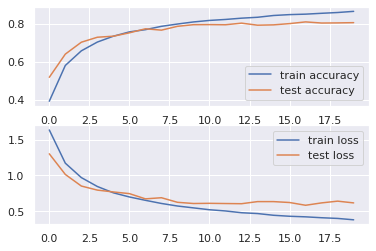

In [8]:
# check train/test accuracy/loss
fig, ax = plt.subplots(2)
ax[0].plot(history.history['accuracy'], label='train accuracy')
ax[0].plot(history.history['val_accuracy'], label='test accuracy')
ax[0].legend()
ax[1].plot(history.history['loss'], label='train loss')
ax[1].plot(history.history['val_loss'], label='test loss')
ax[1].legend()
plt.show()

<class 'PIL.Image.Image'>


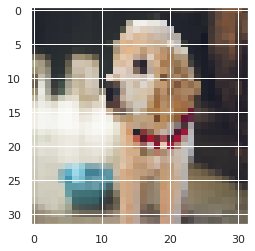

In [9]:
# test an image outside of the dataset
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
dog = load_img('/content/drive/MyDrive/GitHub/cifar10/photo-1507146426996-ef05306b995a.jfif', target_size=(32,32))
print(type(dog))
plt.imshow(dog)

In [10]:
dog = img_to_array(dog)
print(type(dog), dog.shape)
dog = np.array([dog])

<class 'numpy.ndarray'> (32, 32, 3)


In [11]:
result = model.predict(dog)
result[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
cifar10_names[np.argmax(result[0])]

'dog'